### <font color = red>Attention: Don't ask TA to read your code at least for 30 minutes. TA is not a debugger. Just ask about Python syntax or course contents. </font>
# <font color = blue>Exercise 1 </font>
### (1) Find a minima of the following function.

$$Z = e^{-(X+1)^2-Y^2}(Y-1)^2-e^{-(Y+1)^2-X^2}+e^{-X^2-Y^2}(Y^5+X^3)$$

### (2) Check the correctness of your solution by drawing the graph of the function.

### <font color = blue>Use the following codes if needed.</font>

In [85]:
import torch
import torch.optim as optim # See https://pytorch.org/docs/stable/optim.html
from torch.nn.parameter import Parameter # See https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html


# Initialize a starting point
params = torch.rand(2) # See https://pytorch.org/docs/stable/generated/torch.rand.html
params = Parameter(params)

# Reverse mode automatic differentiation
OPTIMIZER = optim.SGD([params], lr = 0.1)
num_it = 100

def function(params):
    ones = torch.ones(2)
    return torch.mean((params-ones)**2)
    
for i in range(num_it):
    if i %10 == 0:
        print(i,params)

    loss = function(params)
    
    # Wipe up gradient in the previous step
    OPTIMIZER.zero_grad() 
    
    # Computes the gradient of current tensor w.r.t. graph leaves.
    loss.backward() 
    
    # Updates the parameters
    OPTIMIZER.step()


0 Parameter containing:
tensor([0.1161, 0.3917], requires_grad=True)
10 Parameter containing:
tensor([0.6918, 0.7879], requires_grad=True)
20 Parameter containing:
tensor([0.8925, 0.9260], requires_grad=True)
30 Parameter containing:
tensor([0.9625, 0.9742], requires_grad=True)
40 Parameter containing:
tensor([0.9869, 0.9910], requires_grad=True)
50 Parameter containing:
tensor([0.9954, 0.9969], requires_grad=True)
60 Parameter containing:
tensor([0.9984, 0.9989], requires_grad=True)
70 Parameter containing:
tensor([0.9994, 0.9996], requires_grad=True)
80 Parameter containing:
tensor([0.9998, 0.9999], requires_grad=True)
90 Parameter containing:
tensor([0.9999, 1.0000], requires_grad=True)


In [18]:
#Modify the following code to verify the correct of your code
from scipy import optimize

def function(params):
    X = params[0]
    Y = params[1]
    return ((X-1)**2+(Y-1)**2)/2

print(optimize.brute(function, ((-4,4),(-4,4))))

[0.99997548 1.00000035]


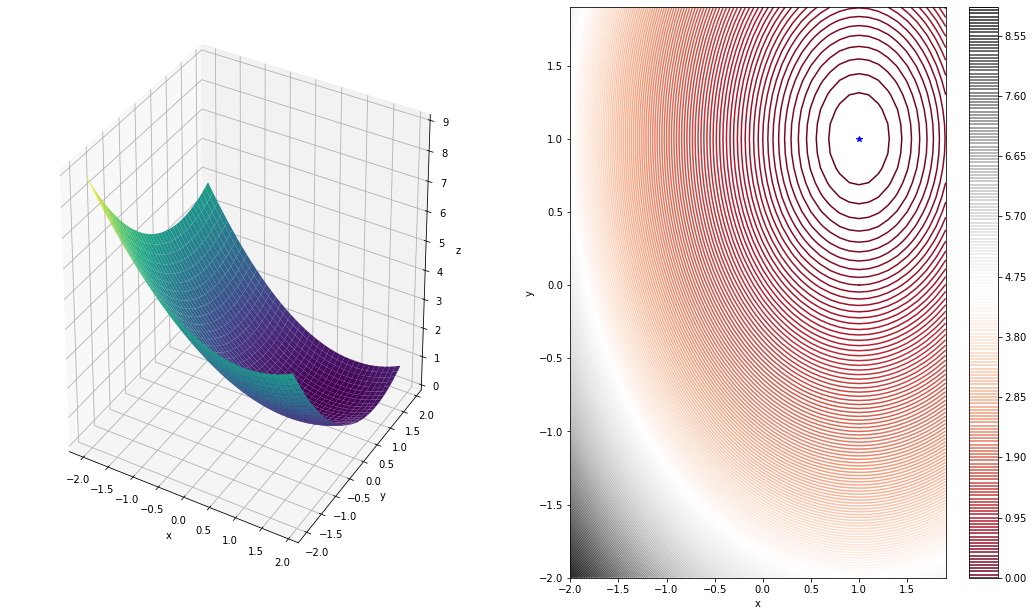

In [17]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


x_range = np.arange(-2.0, 2.0, 0.1)
y_range = np.arange(-2.0, 2.0, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = ((X-1)**2+(Y-1)**2)/2

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
fig.set_size_inches(18.5, 10.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2)
countour = ax2.contour(X, Y, Z, 200, cmap='RdGy')
fig.colorbar(countour)
ax2.plot(1,1,'*',color='blue')


ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

# <font color = blue>Exercise 2 </font>

### (3) Write the lostic regression model to distinguish two number images for $4$ and $9$. 

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  Use SGD for the optimization method and Don't use torch.nn.Module.

### (4) Consider variants
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  1. Distinguish two other numbers
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2. Use MSE loss instead of BCE loss
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  3. Use DataLoader and apply minibatch SGD

### <font color = blue>Use the following codes if needed.</font>

In [78]:
from torchvision import datasets
import torchvision.transforms as transforms


### dataset for training parameters
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
### dataset for testing the accuracy of the trained parameters
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor())

print('train dataset size:',len(train_dataset.data))
print('test dataset size:',len(test_dataset.data))


'''
Choose two numbers and prepare datasets with two numbers.
'''
nb1 = 5
nb2 = 6

train_dataset.data = torch.cat([train_dataset.data[(train_dataset.targets == nb1)],train_dataset.data[(train_dataset.targets == nb2)]],dim=0)
train_dataset.targets = torch.cat([train_dataset.targets[(train_dataset.targets == nb1)],train_dataset.targets[(train_dataset.targets == nb2)]],dim=0)

train_dataset.targets[(train_dataset.targets == nb1)] = 0
train_dataset.targets[(train_dataset.targets == nb2)] = 1

'''
Do the same thing for the test dataset
'''

test_dataset.data = torch.cat([test_dataset.data[(test_dataset.targets == nb1)],test_dataset.data[(test_dataset.targets == nb2)]],dim=0)
test_dataset.targets = torch.cat([test_dataset.targets[(test_dataset.targets == nb1)],test_dataset.targets[(test_dataset.targets == nb2)]],dim=0)

test_dataset.targets[(test_dataset.targets == nb1)] = 0
test_dataset.targets[(test_dataset.targets == nb2)] = 1


''' Define your model '''

class logistic_regression:
    def __init__(self):
        
        ''' Write your code 
        use the followings if needed
            torch.empty
            torch.nn.init.normal_
        '''
        
    def forward(self, x):
        ''' Write your code 
        use the follwings if needed
            .view
            .reshape
            torch.matmul
            torch.sigmoid
        '''        
        return 

    
    
''' Choose loss function'''
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
loss = torch.nn.BCELoss()


import random
''' Define model and optimizer'''
LR_model = logistic_regression()
OPTIMIZER = 

num_it = len(train_dataset.data)

for i in range(num_it):


train dataset size: 60000
test dataset size: 10000


AttributeError: 'logistic_regression' object has no attribute 'w_params'

In [75]:
''' Test for train_dataset '''
count = 0
for i in range(train_dataset.targets.size()[0]):
    image = train_dataset.data[i]
    label = train_dataset.targets[i]    
    
    prediction = (LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5]))
    if prediction == label: 
        count += 1
        
print('total: {}, correctly matched: {}, accuracy: {:.2f}%\n'.format(train_dataset.targets.size()[0], count, count/train_dataset.targets.size()[0] * 100. ) )    

''' Test for test_dataset '''
count = 0
wrong_answer = []
for i in range(test_dataset.targets.size()[0]):
    image = test_dataset.data[i]
    label = test_dataset.targets[i]    
    
    prediction = LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5])
    if prediction == label: 
        count += 1
    else:
        wrong_answer += [i]   
        
print('total: {}, correctly matched: {} accuracy: {:.2f}%\n'.format(test_dataset.targets.size()[0], count, count/test_dataset.targets.size()[0] * 100. ) )
'''
Wrong Answers by Our LR_model
'''
for i in range(3):
    image = test_dataset.data[wrong_answer[i]]
    print('0/False means {} and 1/True means {}'.format(nb1,nb2))
    print(test_dataset.targets[wrong_answer[i]], LR_model.forward(image.float().view(-1, 28*28)) >= torch.FloatTensor([0.5]))
    plt.imshow(image, cmap='gray')
    plt.show()

TypeError: '>=' not supported between instances of 'NoneType' and 'Tensor'